## Data Description

Avocado is a fruit consumed mostly in United States. The data given was downloaded from he Hass Avocado Board website in May of 2018 & compiled into a single CSV. The data is directly from the retail scan data. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting from 2013 data shows multi-outlet retail data.Average price of avocadoes are given and is to be predicted using given features.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df= pd.read_csv(r"avocado.csv",parse_dates=["Date"])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

No. of rows= 18249

No. of columns= 14

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### Relevant columns

Date - The date of the observation

AveragePrice - the average price of a single avocado(continuous)

type - conventional or organic(categorical)

year - the year of observation

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [6]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [7]:
df.Date.unique()

array(['2015-12-27T00:00:00.000000000', '2015-12-20T00:00:00.000000000',
       '2015-12-13T00:00:00.000000000', '2015-12-06T00:00:00.000000000',
       '2015-11-29T00:00:00.000000000', '2015-11-22T00:00:00.000000000',
       '2015-11-15T00:00:00.000000000', '2015-11-08T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-10-25T00:00:00.000000000',
       '2015-10-18T00:00:00.000000000', '2015-10-11T00:00:00.000000000',
       '2015-10-04T00:00:00.000000000', '2015-09-27T00:00:00.000000000',
       '2015-09-20T00:00:00.000000000', '2015-09-13T00:00:00.000000000',
       '2015-09-06T00:00:00.000000000', '2015-08-30T00:00:00.000000000',
       '2015-08-23T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
       '2015-08-09T00:00:00.000000000', '2015-08-02T00:00:00.000000000',
       '2015-07-26T00:00:00.000000000', '2015-07-19T00:00:00.000000000',
       '2015-07-12T00:00:00.000000000', '2015-07-05T00:00:00.000000000',
       '2015-06-28T00:00:00.000000000', '2015-06-21

In [8]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

#### We will now convert date data into months and days to make it simpler to analyze data

In [9]:
df_dates=pd.DataFrame()

In [10]:
df_dates["Month"]=df["Date"].dt.month_name()

In [11]:
df_dates["day"]=df["Date"].dt.day_name()

In [12]:
dff=pd.concat([df,df_dates],axis=1)
dff.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Sunday
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Sunday
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,Sunday
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,Sunday
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,Sunday


In [13]:
df.shape

(18249, 14)

Data now has 18249 rows and 14 columns

### Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

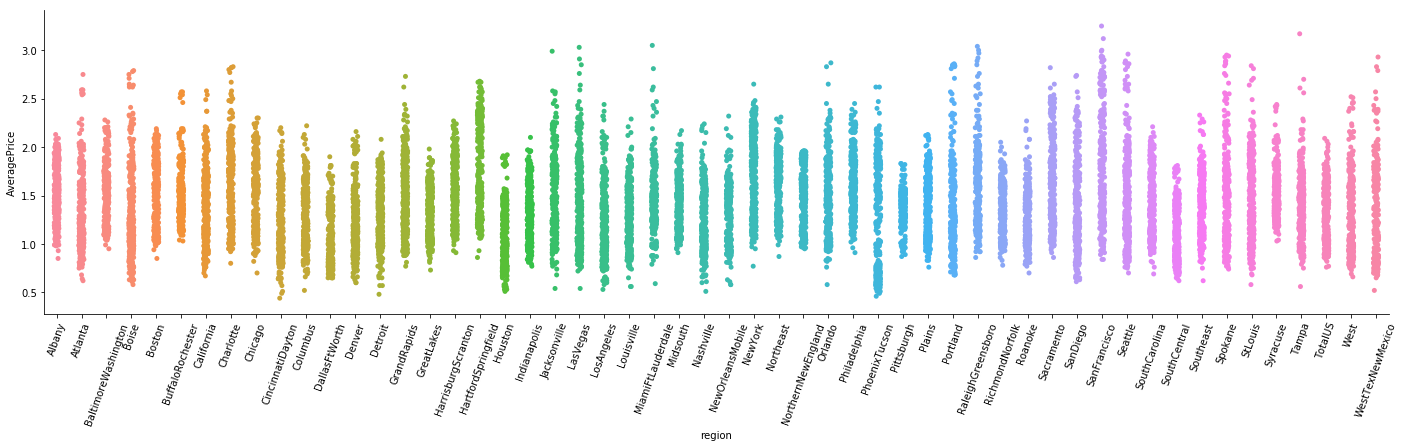

In [14]:
sns.catplot(x="region", y= "AveragePrice", data= df, aspect=4)
plt.xticks(rotation=70)

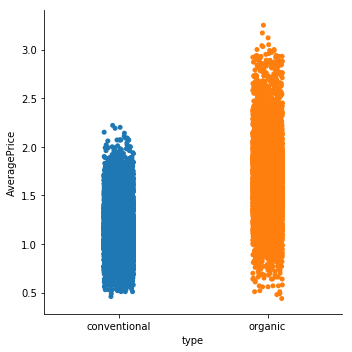

In [15]:
sns.catplot(x="type", y= "AveragePrice", data= dff, aspect=1)

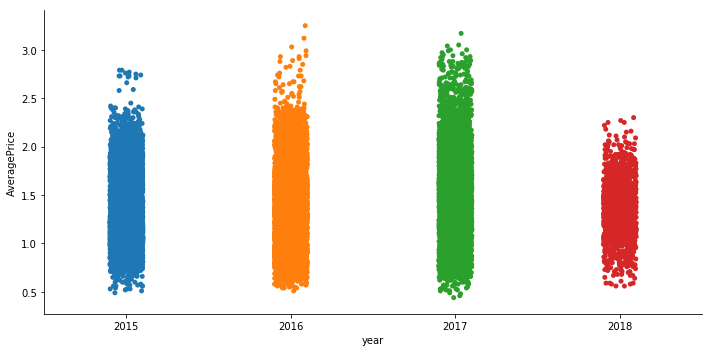

In [16]:
sns.catplot(x="year", y= "AveragePrice", data= dff, aspect=2)

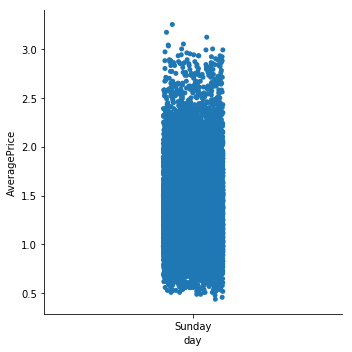

In [17]:
sns.catplot(x="day", y= "AveragePrice", data= dff, aspect=1)

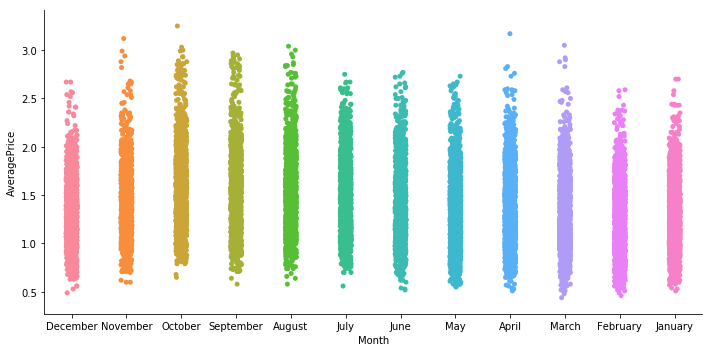

In [18]:
sns.catplot(x="Month", y= "AveragePrice", data= dff, aspect=2)

In [19]:
 dff=dff.drop(columns=["Unnamed: 0","Date"],axis=1)

In [20]:
obj_lst=["type","region","day","Month"]
lab_enc= LabelEncoder()
for i in obj_lst:
    df1= lab_enc.fit_transform(dff[i])
    dff[i]=df1
dff.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,9,0


#### Check for correlation

In [21]:
dff.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.119089,NaN
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.012003,NaN
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.013348,NaN
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.008662,NaN
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.012535,NaN
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.012969,NaN
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.013886,NaN
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.008635,NaN
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.018272,NaN
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000038,NaN


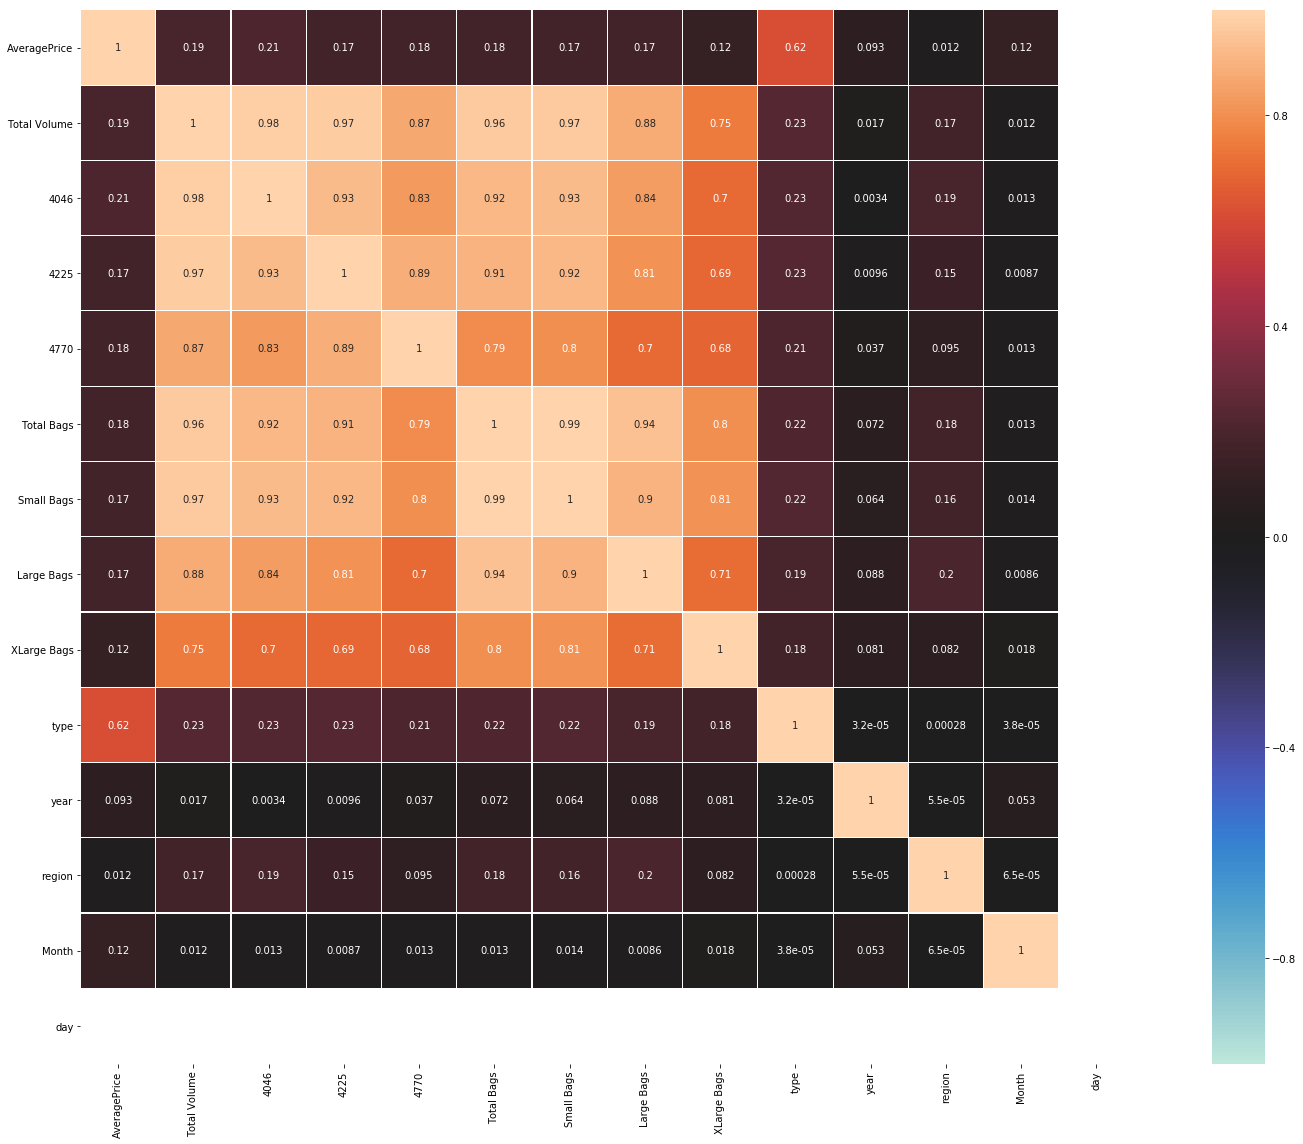

In [22]:
## HeatMap
dff_corr= dff.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(dff_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We observe positive as well as negative correlation between features and average price. We also observe multicollinearity between features. Product lookup codes, total bags, small bags and large bags.

Day has only one value and does has no relation with any of variables and hence we can drop it.

We will now plot and check for relationship between total bags, total volume, small bags, large bags, xlarge bags and PLC

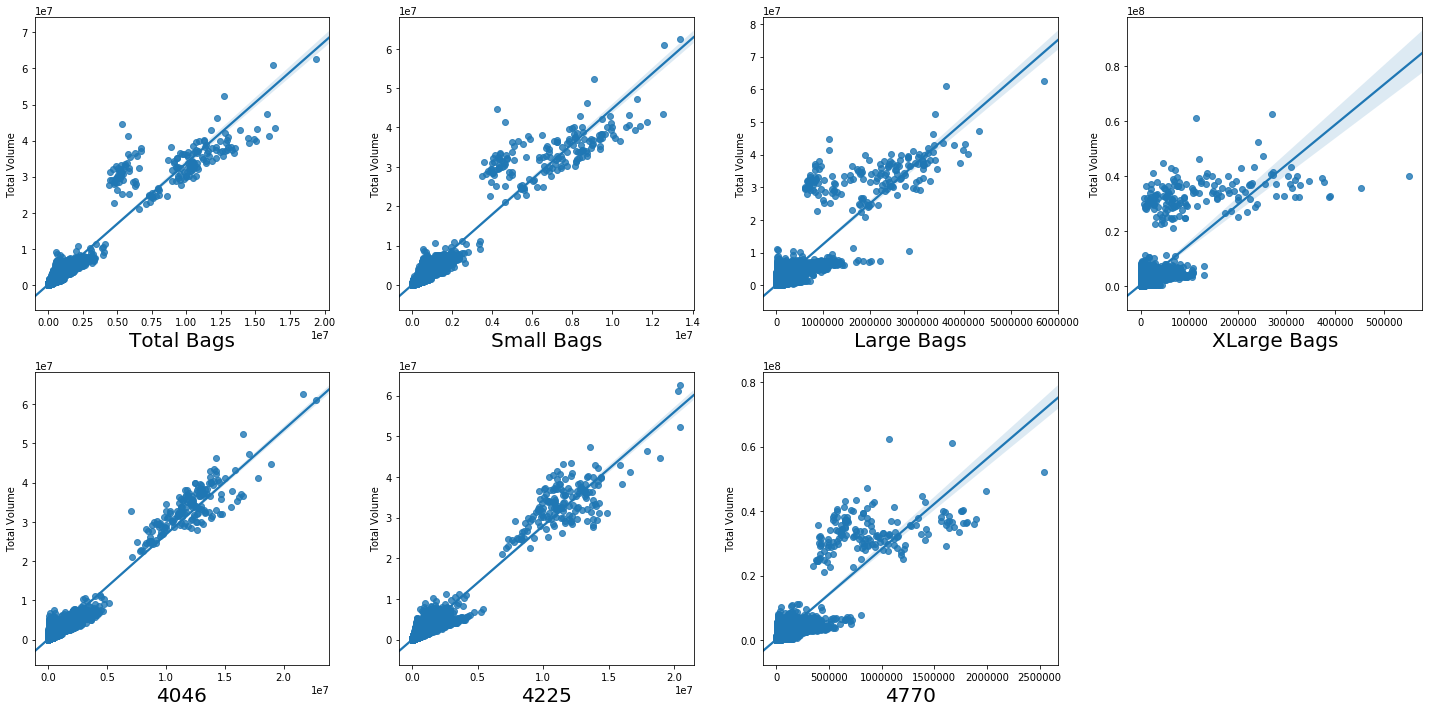

In [23]:
columns=["Total Bags","Small Bags","Large Bags","XLarge Bags","4046","4225","4770"]
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1

for col in columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(x=col, y="Total Volume",data=dff)
        plt.xlabel(col, fontsize=20)
    plotnumber+=1
plt.tight_layout()

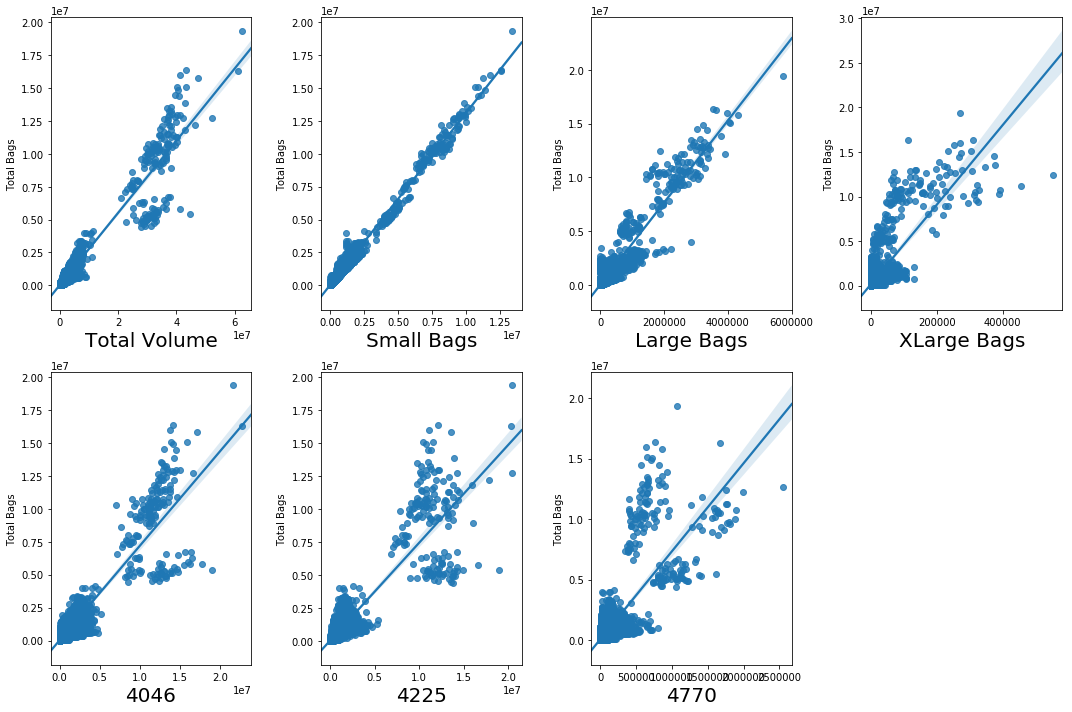

In [24]:
columns=["Total Volume","Small Bags","Large Bags","XLarge Bags","4046","4225","4770"]
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for col in columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(x=col, y="Total Bags",data=dff)
        plt.xlabel(col, fontsize=20)
    plotnumber+=1
plt.tight_layout()

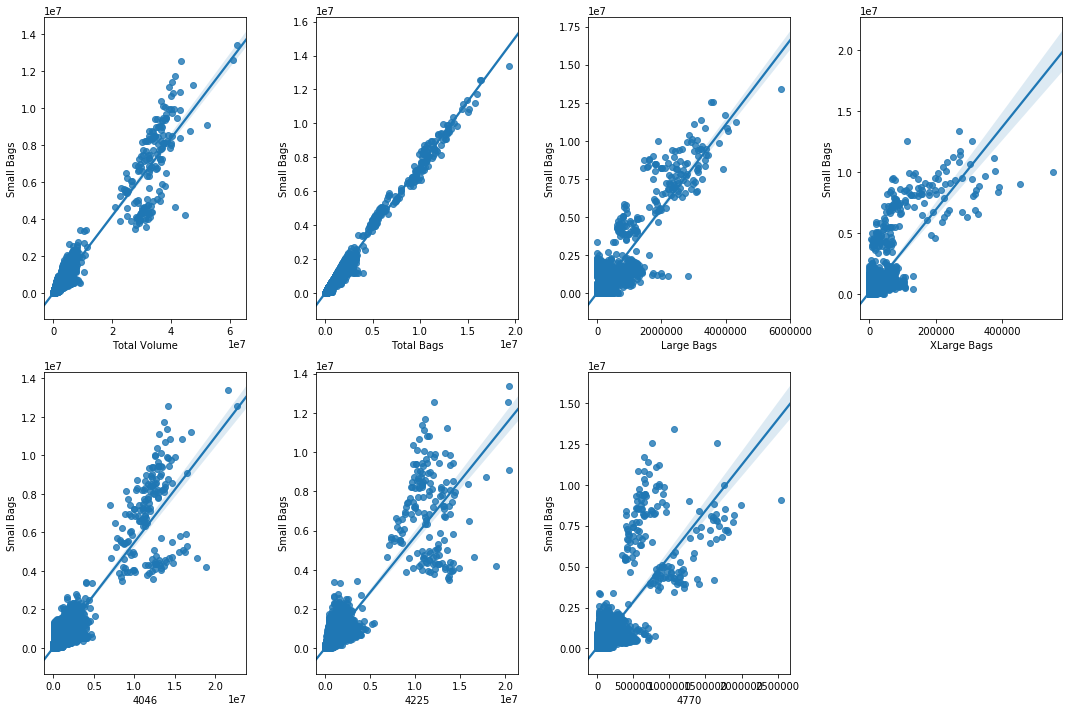

In [25]:
columns=["Total Volume","Total Bags","Large Bags","XLarge Bags","4046","4225","4770"]
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for col in columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(x=col, y="Small Bags",data=dff)
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.tight_layout()

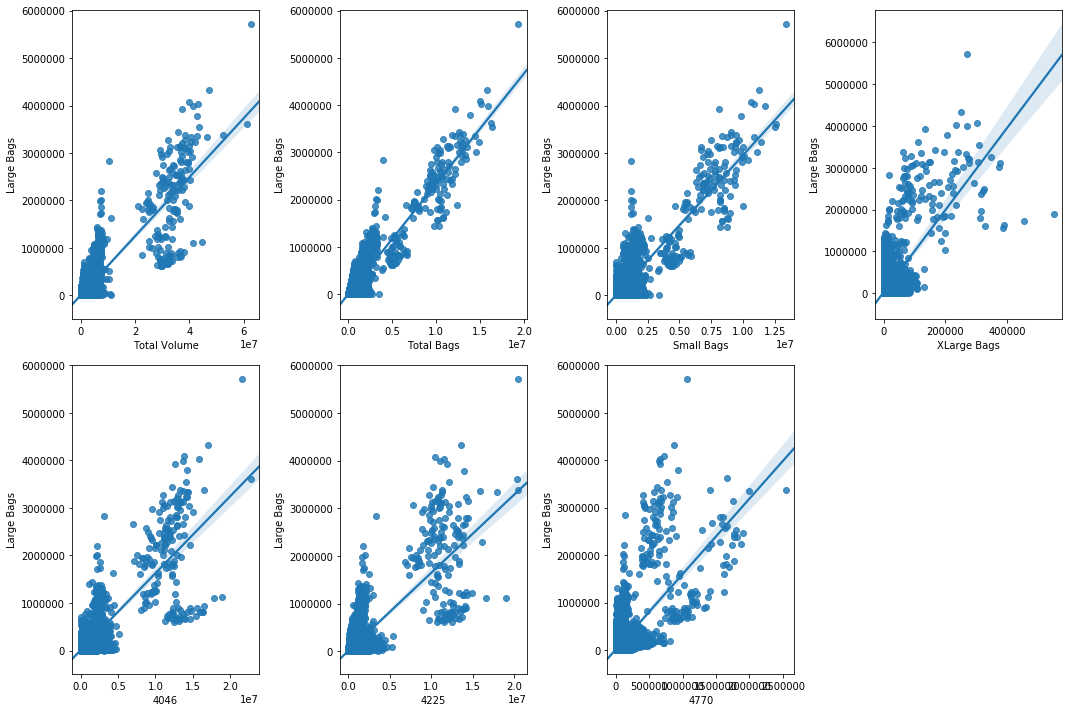

In [26]:
columns=["Total Volume","Total Bags","Small Bags","XLarge Bags","4046","4225","4770"]
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for col in columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(x=col, y="Large Bags",data=dff)
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.tight_layout()

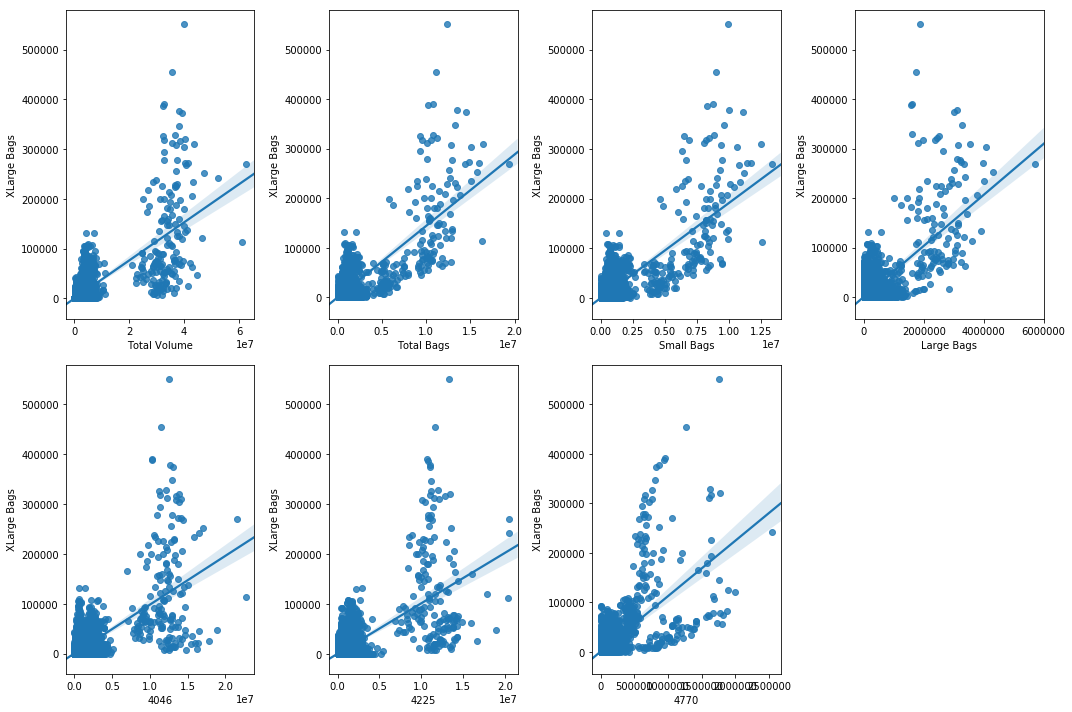

In [27]:
columns=["Total Volume","Total Bags","Small Bags","Large Bags","4046","4225","4770"]
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for col in columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(x=col, y="XLarge Bags",data=dff)
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.tight_layout()

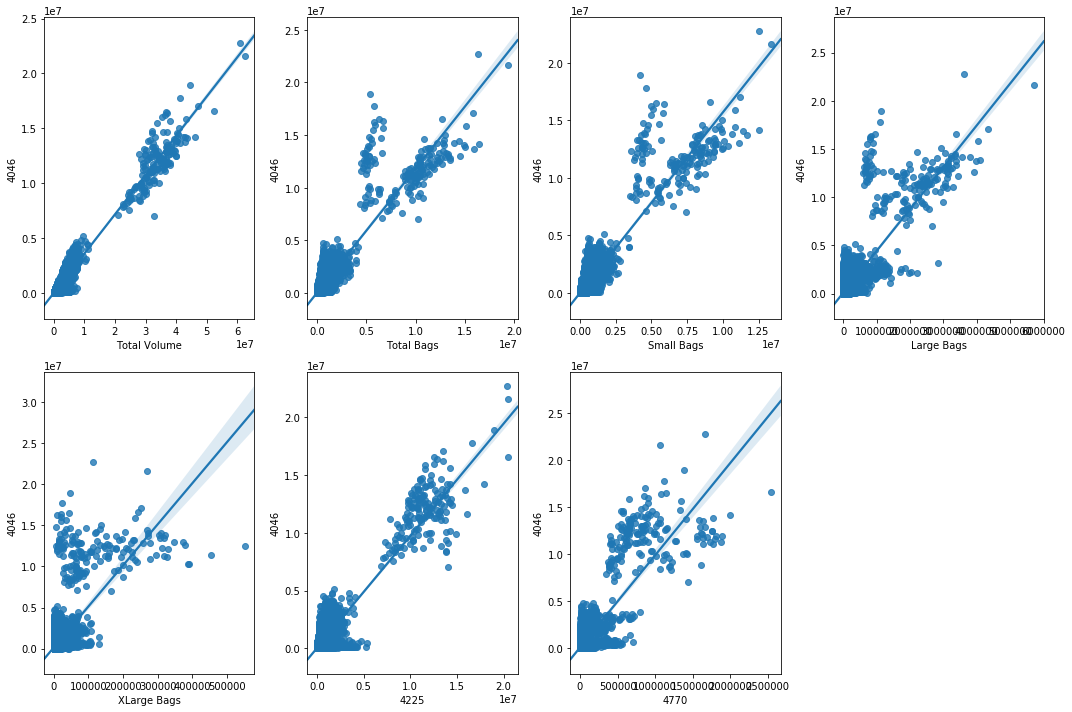

In [28]:
columns=["Total Volume","Total Bags","Small Bags","Large Bags","XLarge Bags","4225","4770"]
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for col in columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(x=col, y="4046",data=dff)
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.tight_layout()

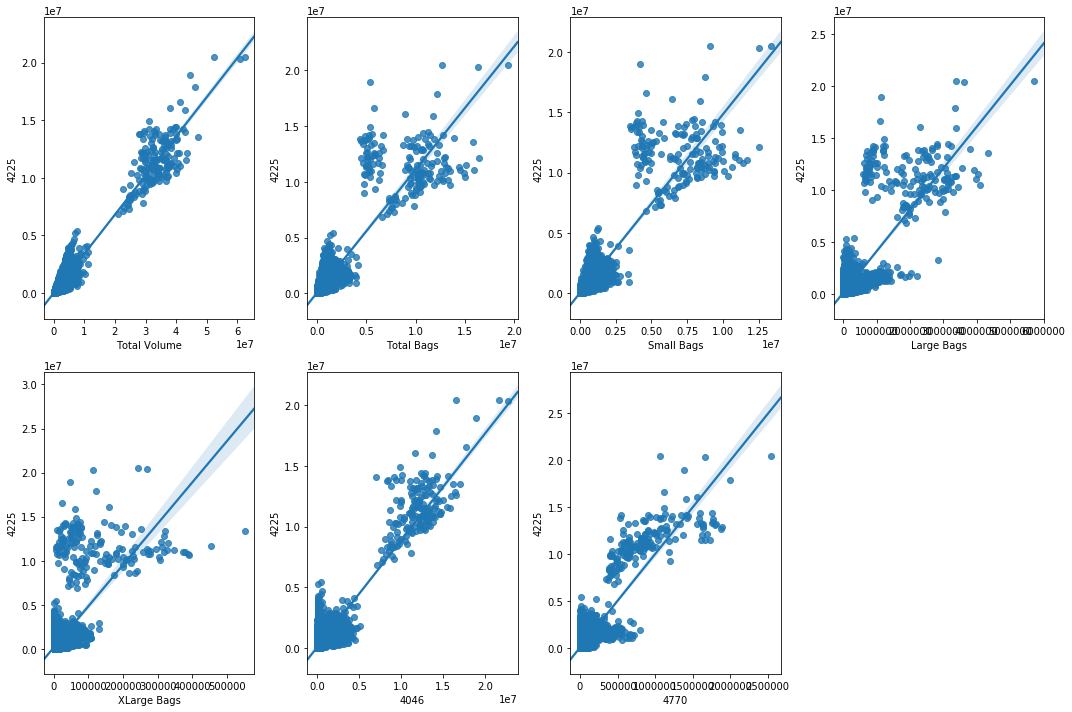

In [29]:
columns=["Total Volume","Total Bags","Small Bags","Large Bags","XLarge Bags","4046","4770"]
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for col in columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(x=col, y="4225",data=dff)
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.tight_layout()

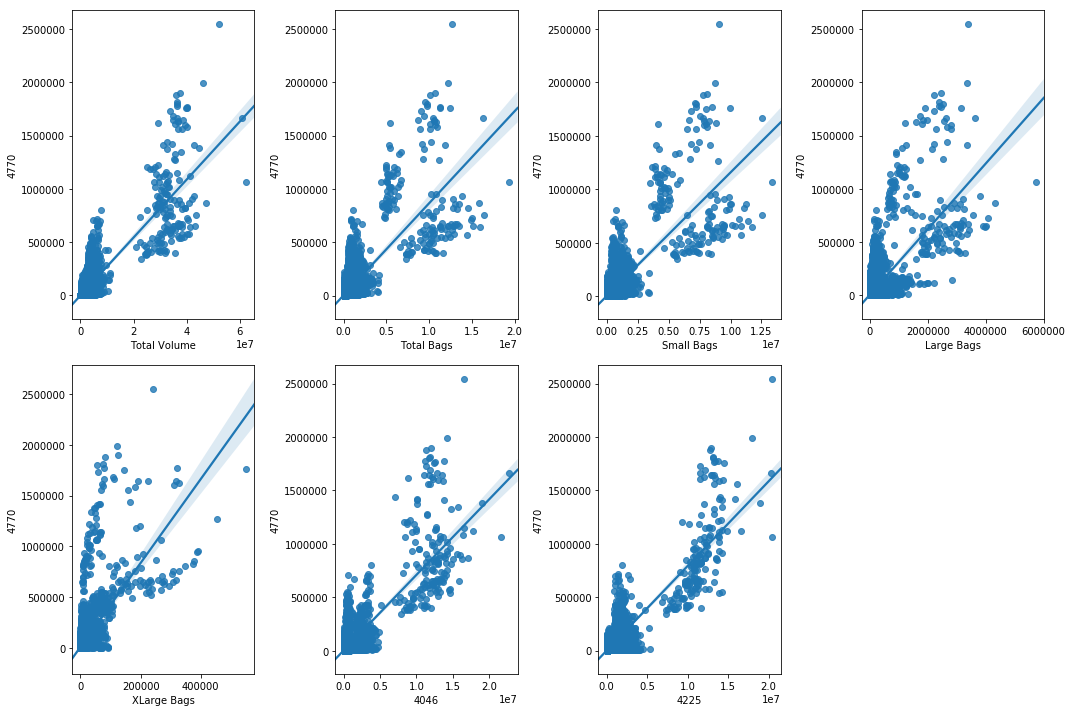

In [30]:
columns=["Total Volume","Total Bags","Small Bags","Large Bags","XLarge Bags","4046","4225"]
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for col in columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(x=col, y="4770",data=dff)
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.tight_layout()

From above plots we observe a high correlation between these variables i.e., multicollinearity exists.Thus we will use variance inflation factor to choose for the features to use in our model.

### Describing Data

In [31]:
dff.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.0
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,5.449833,0.0
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.347808,0.0
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,0.000000,0.0
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000,0.0
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,5.000000,0.0
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,8.000000,0.0
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,11.000000,0.0


From above we observe Mean, Standard Deviation, Quantiles, Minimum and Maximum values for each column.

Looking at description we observe Outliers in or data. We will now plot and look for outliers.

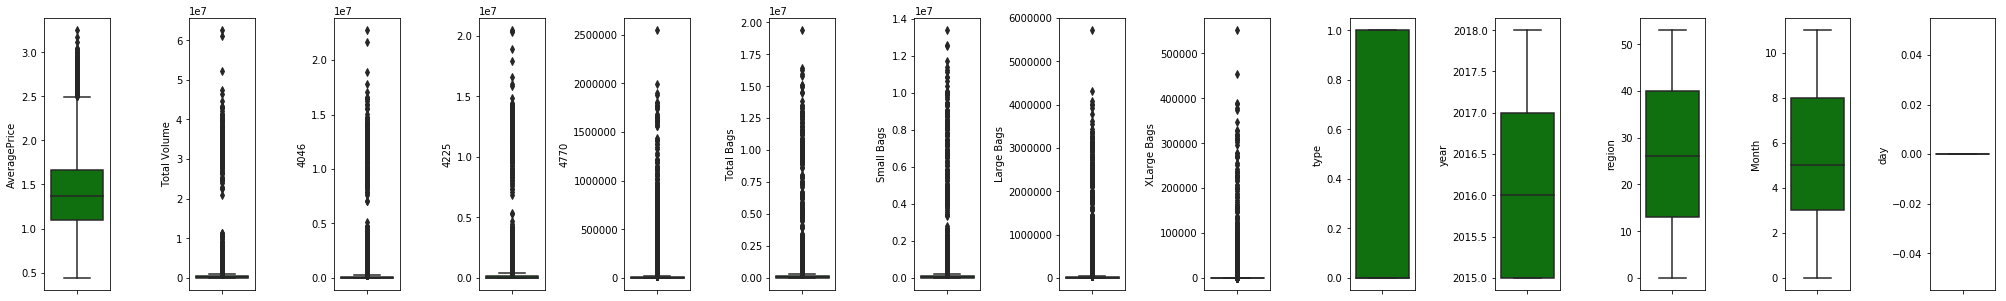

In [32]:
collist=dff.columns.values
plt.figure(figsize=(40,60))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(dff[collist[i]],color='green',orient='v')
    plt.tight_layout()

We observe here that variables with multicollinearity has too many outliers in it and thus our data will be skewed. Now we will move towards cleaning our data.

## Data Cleaning

In [33]:
from scipy import stats
z=np.abs(stats.zscore(dff))
index=(np.where(z>3)[0])
df_new=dff.drop(dff.index[index])
df_new.shape

(17651, 14)

In [34]:
print("Percentage of data loss= ",((18249-17651)/18249)*100)

Percentage of data loss=  3.276891884486821


We have lost only 3% of data hence we can move further now.

In [35]:
df_new=df_new.drop(columns=["day"])

In [36]:
X=df_new.drop(columns=["AveragePrice"],axis=1)

In [37]:
scale=StandardScaler()
x_scaled=scale.fit_transform(X)

In [38]:
vif= pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']= X.columns
vif

,Score,Features
0,4.126910e+08,Total Volume
1,7.775073e+07,4046
2,6.409191e+07,4225
3,4.786147e+05,4770
4,1.924615e+13,Total Bags
5,1.275807e+13,Small Bags
6,1.290800e+12,Large Bags
7,6.646644e+09,XLarge Bags
8,1.231782e+00,type
9,1.094770e+00,year


From all the observations we made looking at correlation, outliers and variance inflation fator we will now drop "Small Bags", "Large Bags" and "XLarge Bags". Though we observe high multicollinearity between Product lookup codes but we will keep them and move further to build our model. But before that we'll check for skewness and remove if any

In [39]:
df_new=df_new.drop(columns=["Small Bags","Large Bags","XLarge Bags"],axis=1)

In [40]:
x= df_new.drop(columns=["AveragePrice"],axis=1)
y= df_new["AveragePrice"]

In [41]:
x.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
type           -0.037741
year            0.229976
region          0.012798
Month           0.029197
dtype: float64

We don't observe skewness thus we will now move forward to scale our data and build model

## Model Building

In [42]:
x_scale= scale.fit_transform(x)

In [43]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=139)

#### Linear Regression

In [44]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
print("Sore= ",lm.score(x_test,y_test))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.4215926463719797
mean squared error=  0.08439815257027063


We observe a very low score thus we will use randomforest regressor, lasso and ridge cv.

#### Lasso CV

In [45]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
y_pred=lasso_reg.predict(x_test)
print("Sore= ",lasso_reg.score(x_test,y_test))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.42157807573472295
mean squared error=  0.08440027864086522


#### Ridge CV

In [46]:
ridgecv= RidgeCV(alphas= np.arange(0.001,0.1,0.01), normalize= True)
ridgecv.fit(x_train, y_train)
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)
print("Sore= ",ridge_model.score(x_train,y_train))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.41941482510619077
mean squared error=  0.08440027864086522


#### RandomForest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
clf= RandomForestRegressor()
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
print("Sore= ",clf.score(x_test,y_test))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.8694725861890608
mean squared error=  0.019045872284160437


#### SVM

In [49]:
svr= SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)
print("Sore= ",svr.score(x_test,y_test))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.5765601261574145
mean squared error=  0.061786114669430466


#### Cross validation Score

In [50]:
cross_val_score(lm,x_train, y_train,cv=5).mean()

0.4186634465403197

In [51]:
cross_val_score(svr,x_train, y_train,cv=5).mean()

0.5685938581508333

In [52]:
cross_val_score(lasso_reg,x_train, y_train,cv=5).mean()

0.41868029671045315

In [53]:
cross_val_score(ridge_model,x_train, y_train,cv=5).mean()

0.4186800163734814

In [54]:
cross_val_score(clf,x_train, y_train,cv=5).mean()

0.8513605194158924

In [55]:
print("RandomForest= ",(86.8927-85.01385))
print("Linear Regression= ",(42.159-41.866))
print("Lasso Regression= ",(42.157-41.86802))
print("Ridge Regression= ",(41.9414-41.868))
print("SVR= ",(57.656-56.859))

RandomForest=  1.87885
Linear Regression=  0.29299999999999926
Lasso Regression=  0.28897999999999513
Ridge Regression=  0.07339999999999947
SVR=  0.796999999999997


Random Forest regressor gives the best accuracy for this model but by looking at cv score we observe that model is overfitting and hence we will choose the least overfitted model for tuning i.e. Ridge Regression Model

### Hyper Parametric Tuning

In [61]:
clf= RandomForestRegressor()
params={'n_estimators':[100], 'criterion':['mse'],
       'max_depth':[10], 'min_samples_split':[2],
       'min_samples_leaf':[1,2]}
grd=GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best params=>',grd.best_params_)

best params=> {'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [58]:
clf= grd.best_estimator_
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [59]:
print("R2 Score = ",clf.score(x_test,y_test))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

R2 Score =  0.8014022496279383
Mean Squared Error=  0.028978337033372405


#### Saving Model

In [62]:
filename= "Avocado.pickle"
pickle.dump(clf,open(filename,'wb'))